In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data.csv', encoding='utf-8')

In [3]:
df.drop(['growth_classification'], axis=1, inplace=True)

In [4]:
df['type_of_change'] = np.where(df['errors'].isna(), 'Non-Breaking', np.where(df['errors'].str.contains('errors'), 'Breaking', 'Non-Breaking'))

In [5]:
allowed_labels = ['major', 'minor', 'patch']

labels = df[df['label'].isin(allowed_labels)]

In [6]:
labels.fillna(0, inplace=True)

In [7]:
labels["type_of_change"] = labels["type_of_change"].replace({"Breaking": 0, "Non-Breaking": 1})

In [36]:
import scipy.stats
from sklearn import mixture
scaler = StandardScaler()

# Get columns to use
cols_to_use = labels.loc [:, 'Info_contact_name_changes':'Age'].columns

data_scaled = scaler.fit_transform(labels[cols_to_use])

# Define the model
model = GaussianMixture(n_components=3, random_state=32, max_iter=400,init_params='random', covariance_type='full', n_init=20, warm_start=True)

# Fit the model
model.fit(data_scaled)

# Get the cluster labels
cluster_labels = model.predict(data_scaled)


# Add a new column for cluster assignments
labels["cluster"] = cluster_labels


In [37]:
labels['cluster'].value_counts()

2    4123
0     551
1     101
Name: cluster, dtype: int64

In [12]:
from sklearn.manifold import TSNE

X = labels.loc[:, "Info_contact_name_changes":"Age"].values
X_embedded = TSNE(n_components=2, init='random', learning_rate='auto'
                 ).fit_transform(X)
labels[['tsne_x', 'tsne_y']] = X_embedded

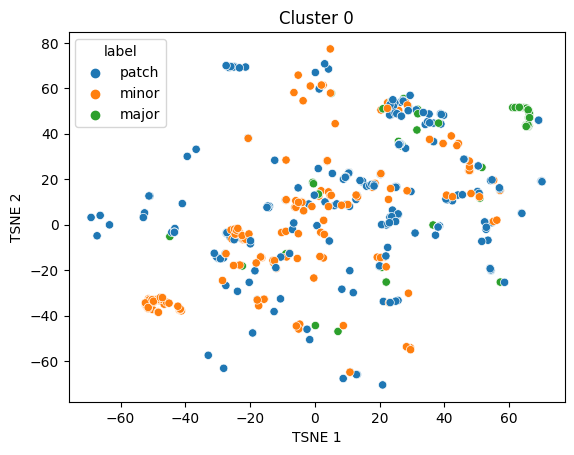

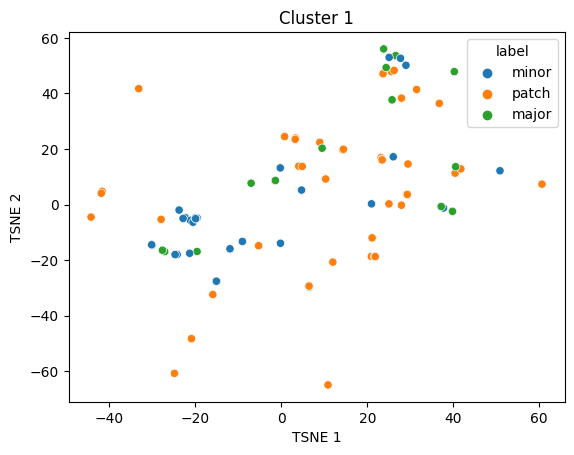

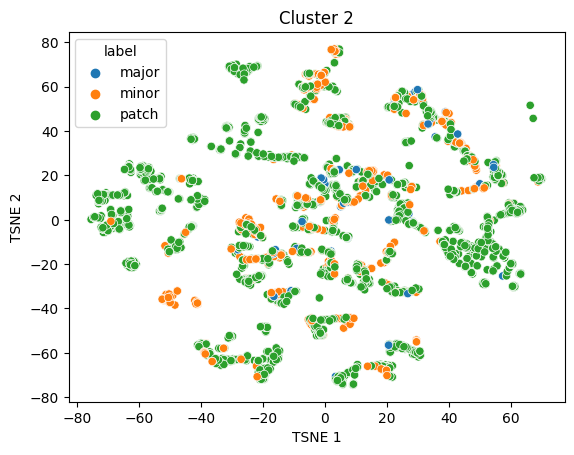

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each cluster
for cluster in range(3):
    
    # Create a subset of the data for the current cluster
    subset = labels[labels["cluster"] == cluster]
    
    # Create a scatter plot of the target variable labels for the current cluster
    sns.scatterplot(x="tsne_x", y="tsne_y", data=subset, hue="label")
    plt.title(f"Cluster {cluster}")
    plt.xlabel("TSNE 1")
    plt.ylabel("TSNE 2")
    plt.show()



<AxesSubplot:xlabel='tsne_x', ylabel='tsne_y'>

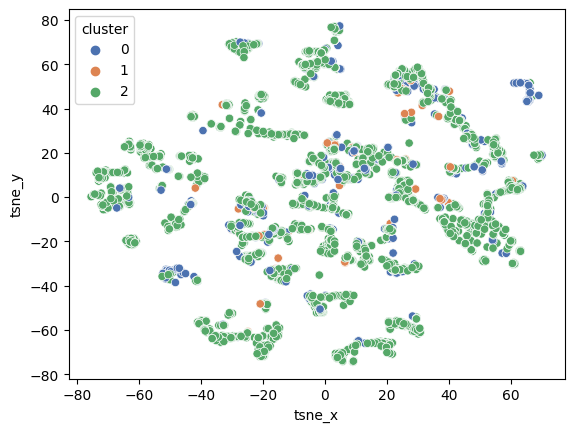

In [15]:
# visualizing the clusters formed after kmeans and pca
sns.scatterplot(data=labels, x='tsne_x', y='tsne_y', hue='cluster', palette='deep')

In [7]:
X = labels.loc [:, 'externalDocs.added':'Endpoints_modified']

In [83]:
labels['label'].value_counts()

patch    3538
minor    1014
major     223
Name: label, dtype: int64

In [31]:
df['label'].groupby(df['type_of_change']).value_counts()

type_of_change  label                
Breaking        patch                     280
                minor                     162
                minor.patch                97
                major.minor.patch          63
                major.minor                48
                major                      39
                major.patch                35
                pre                        31
                minor.patch.pre            12
                minor.pre                   7
                major.pre                   4
                pre.dev                     4
                major.minor.pre             3
                minor.patch.dev             3
                minor.pre.dev               3
                dev                         2
                major.minor.patch.pre       1
                patch.pre                   1
Non-Breaking    patch                    3258
                minor                     852
                minor.patch               

In [84]:
labels['predicted_labels'].value_counts()

patch    4123
major     551
minor     101
Name: predicted_labels, dtype: int64

In [145]:
pd.crosstab(labels['label'], labels['predicted_labels'])

predicted_labels,major,minor,patch
label,,,
major,111,18,94
minor,202,35,777
patch,238,48,3252


In [149]:
labels["type_of_change"] = labels["type_of_change"].replace({0: "Breaking", 1: "Non-Breaking"})

In [150]:
labels['predicted_labels'].groupby(labels['type_of_change']).value_counts()

type_of_change  predicted_labels
Breaking        major                236
                patch                204
                minor                 41
Non-Breaking    patch               3919
                major                315
                minor                 60
Name: predicted_labels, dtype: int64

In [151]:
labels['label'].groupby(labels['type_of_change']).value_counts()

type_of_change  label
Breaking        patch     280
                minor     162
                major      39
Non-Breaking    patch    3258
                minor     852
                major     184
Name: label, dtype: int64

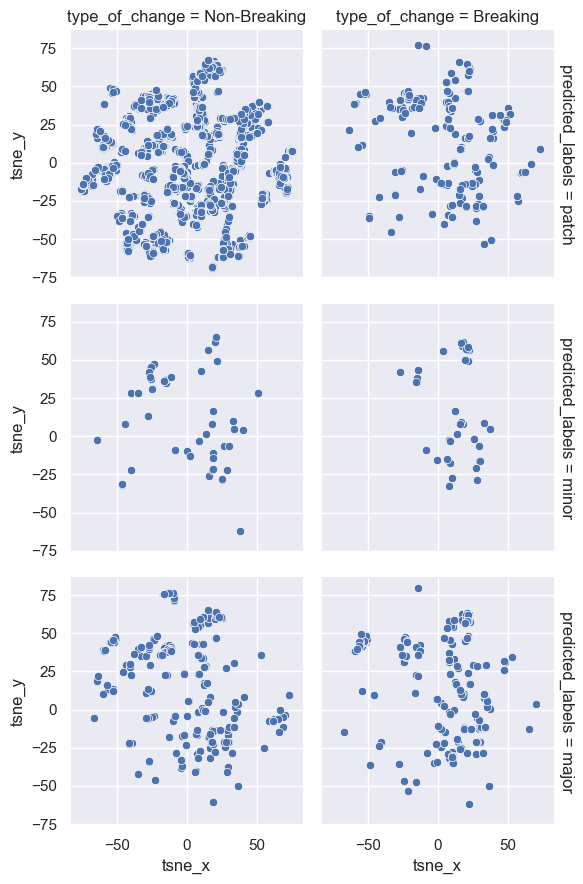

In [152]:
from sklearn.manifold import TSNE

# Plot small multiples, corresponding to confusion matrix.
sns.set()
g = sns.FacetGrid(labels, row='predicted_labels', col='type_of_change', margin_titles=True)
g.map(sns.scatterplot, 'tsne_x', 'tsne_y');

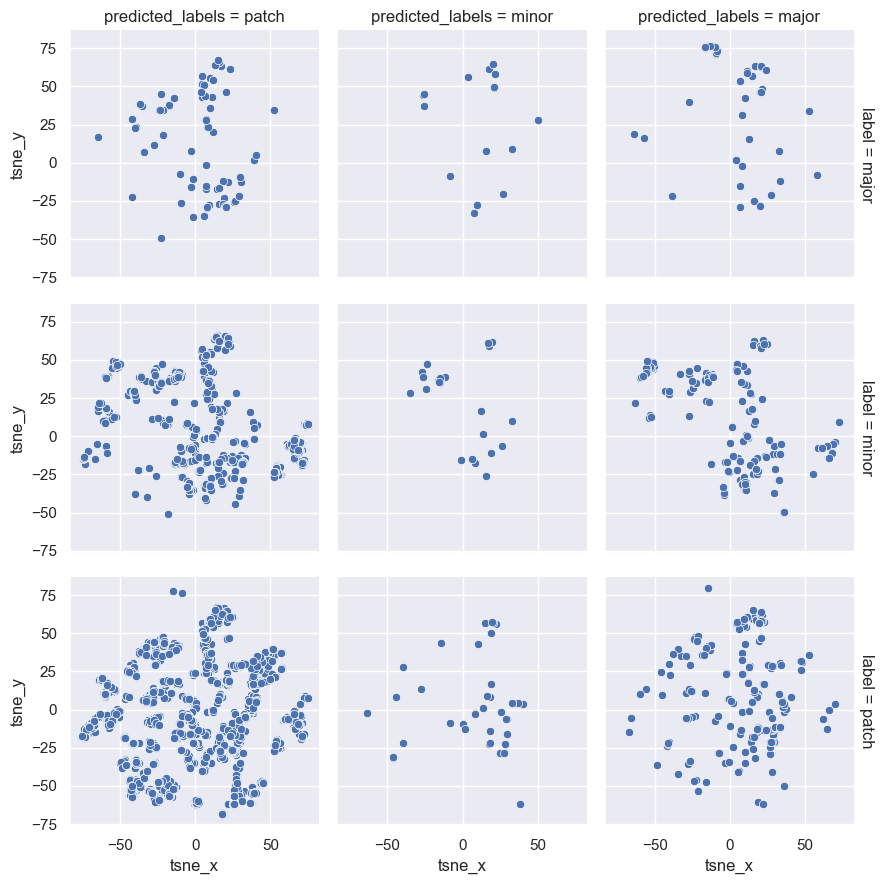

In [153]:
sns.set()
g = sns.FacetGrid(labels, row='label', col='predicted_labels', margin_titles=True)
g.map(sns.scatterplot, 'tsne_x', 'tsne_y');

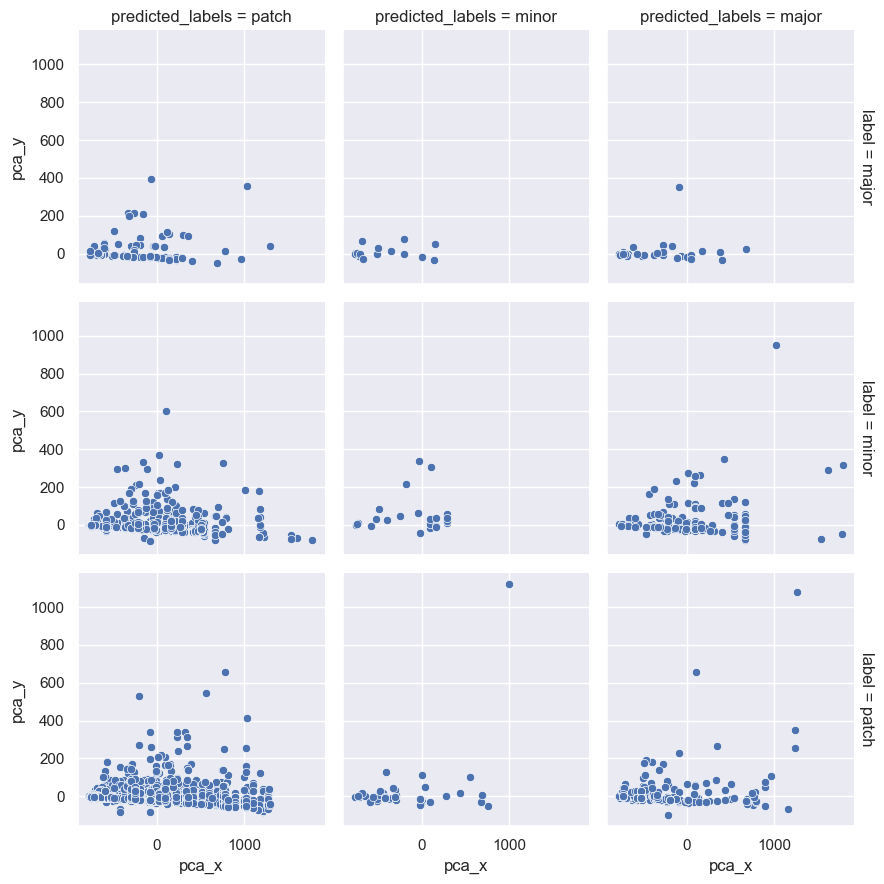

In [154]:
from sklearn.decomposition import PCA
labels["type_of_change"] = labels["type_of_change"].replace({"Breaking": 0, "Non-Breaking": 1})
X = labels.loc[:, "Info_contact_name_changes":"Age"].values
#X= labels[['Paths_added', 'Paths_deleted','Paths_modified', 'Endpoints_modified','Endpoints_added']].values
X_embedded = PCA(n_components=2).fit_transform(X)

labels[['pca_x', 'pca_y']] = X_embedded

sns.set()
g = sns.FacetGrid(labels, row='label', col='predicted_labels', margin_titles=True)
g.map(sns.scatterplot, 'pca_x', 'pca_y');


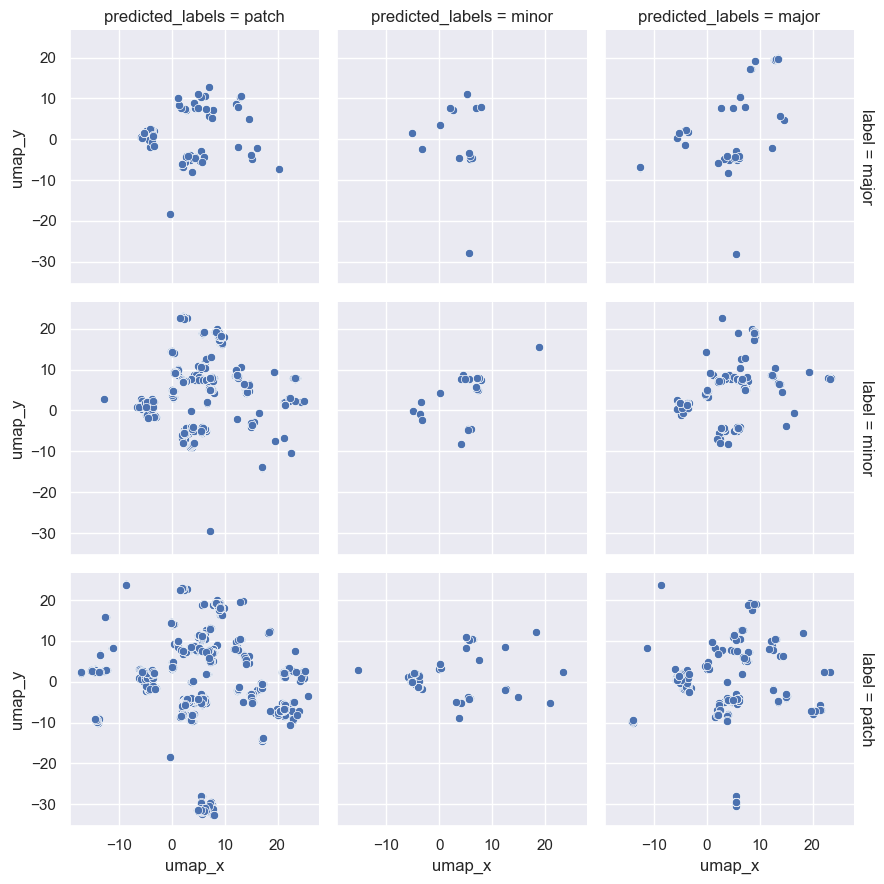

In [155]:
from umap import UMAP
import umap
import seaborn as sns

X = labels.loc[:, "Info_contact_name_changes":"Age"].values
X_embedded = umap.UMAP(n_components=2).fit_transform(X)
labels[['umap_x', 'umap_y']] = X_embedded

sns.set()
g = sns.FacetGrid(labels, row='label', col='predicted_labels', margin_titles=True)
g.map(sns.scatterplot, 'umap_x', 'umap_y');


In [123]:
prac = labels.loc[:, "Info_contact_name_changes":"Age"].values

In [115]:
labels["type_of_change"] = labels["type_of_change"].replace({"Breaking": 0, "Non-Breaking": 1})

In [124]:
sc = StandardScaler()
X = sc.fit_transform(prac)

In [125]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12, whiten=True)

pca_fit= pca.fit(X)

explained_variance= pca.explained_variance_ratio_singular_values = pca.singular_values_

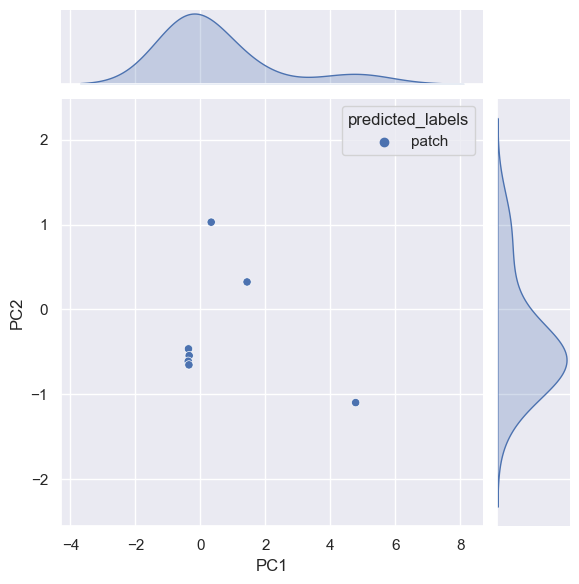

In [126]:
pca = PCA(n_components=2, whiten=True)

X_pca = pca.fit_transform(X)


df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

labels= pd.merge(labels, df, left_index=True, right_index=True, how='inner')

g = sns.jointplot(data=labels,x="PC1", y="PC2", hue="predicted_labels")

In [115]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4774 entries, 39 to 73895
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   api_spec_id                           4774 non-null   int64  
 1   commit_date                           4774 non-null   object 
 2   info_version                          4774 non-null   object 
 3   id                                    4774 non-null   int64  
 4   label                                 4774 non-null   object 
 5   diff2                                 4774 non-null   object 
 6   errors                                4774 non-null   object 
 7   count                                 4774 non-null   int64  
 8   content                               4774 non-null   object 
 9   Year                                  4774 non-null   int64  
 10  type_of_change                        4774 non-null   object 
 11  externalDocs.ad

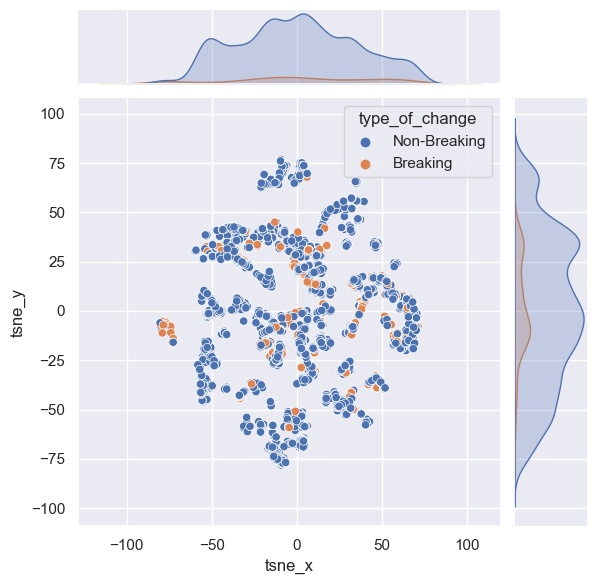

In [104]:
g = sns.jointplot(data=labels,x="tsne_x", y="tsne_y", hue="type_of_change")

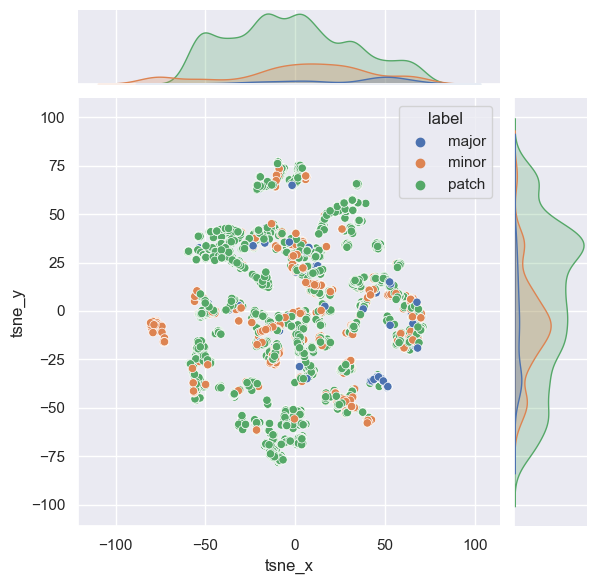

In [103]:
g = sns.jointplot(data=labels,x="tsne_x", y="tsne_y", hue="label")